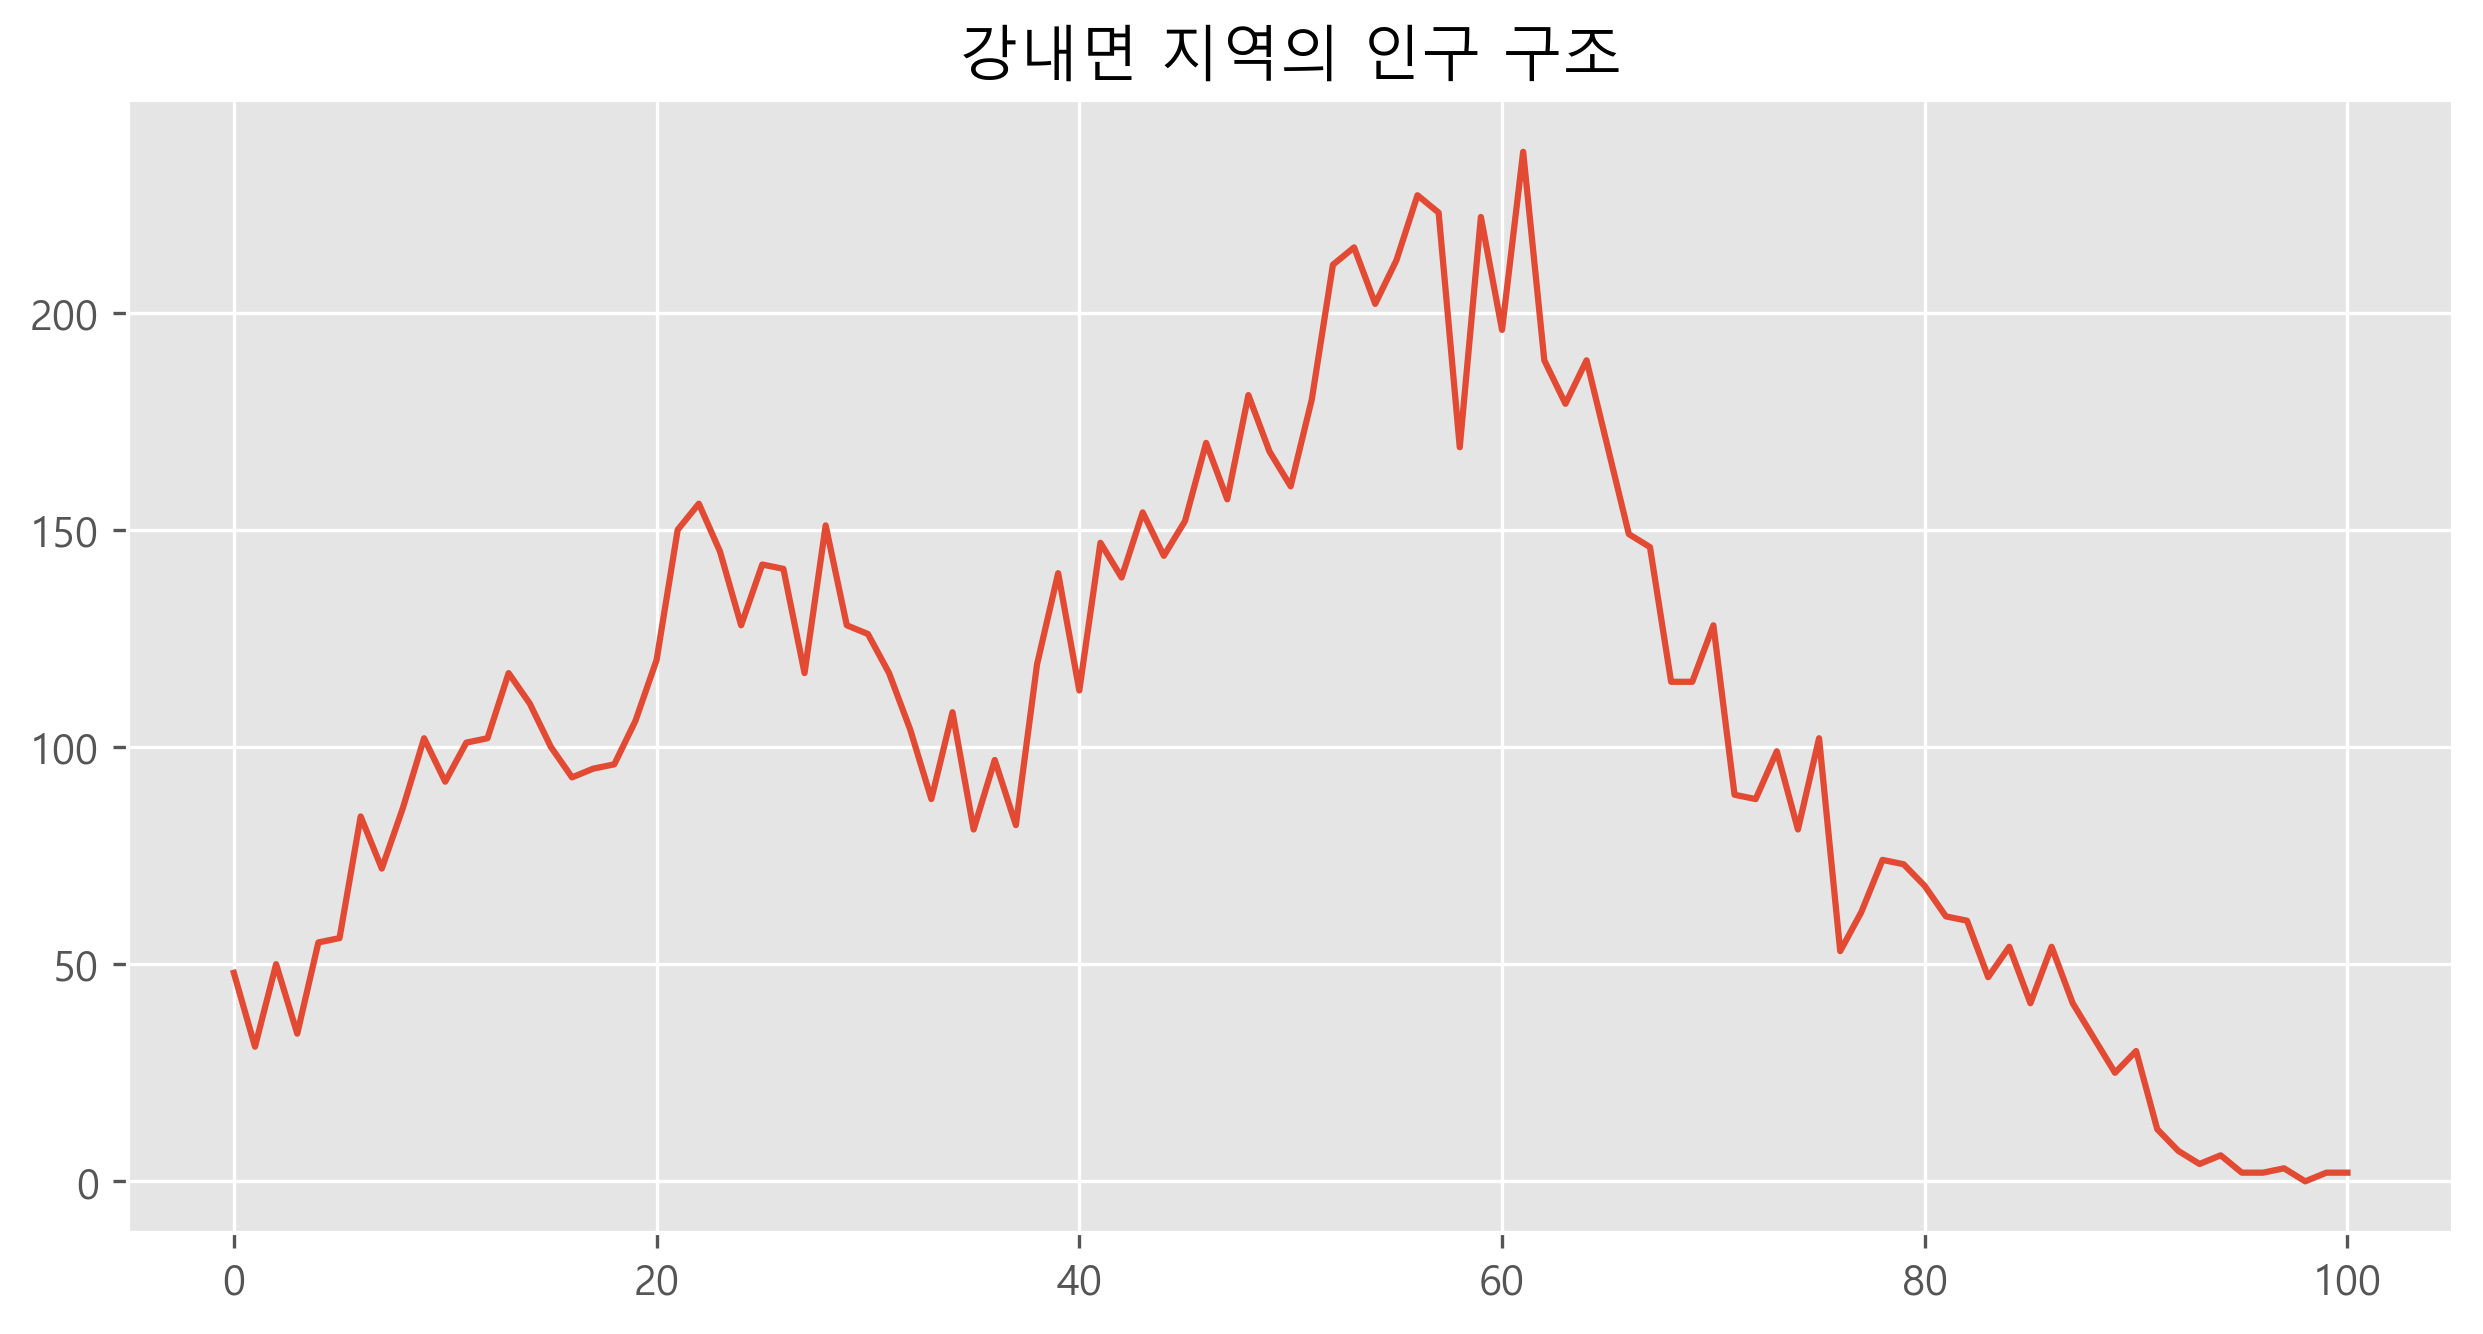

In [3]:
# https://www.data.go.kr/

import numpy as np
import csv
f = open('age.csv')
data = csv.reader(f)
next(data)
name = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요:")
for row in data:
    if name in row[0]:
        home = np.array(row[3:], dtype=int)
#print(home)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
plt.rc('font',family='Malgun Gothic')
plt.title(name + ' 지역의 인구 구조')
plt.plot(home)
plt.show()

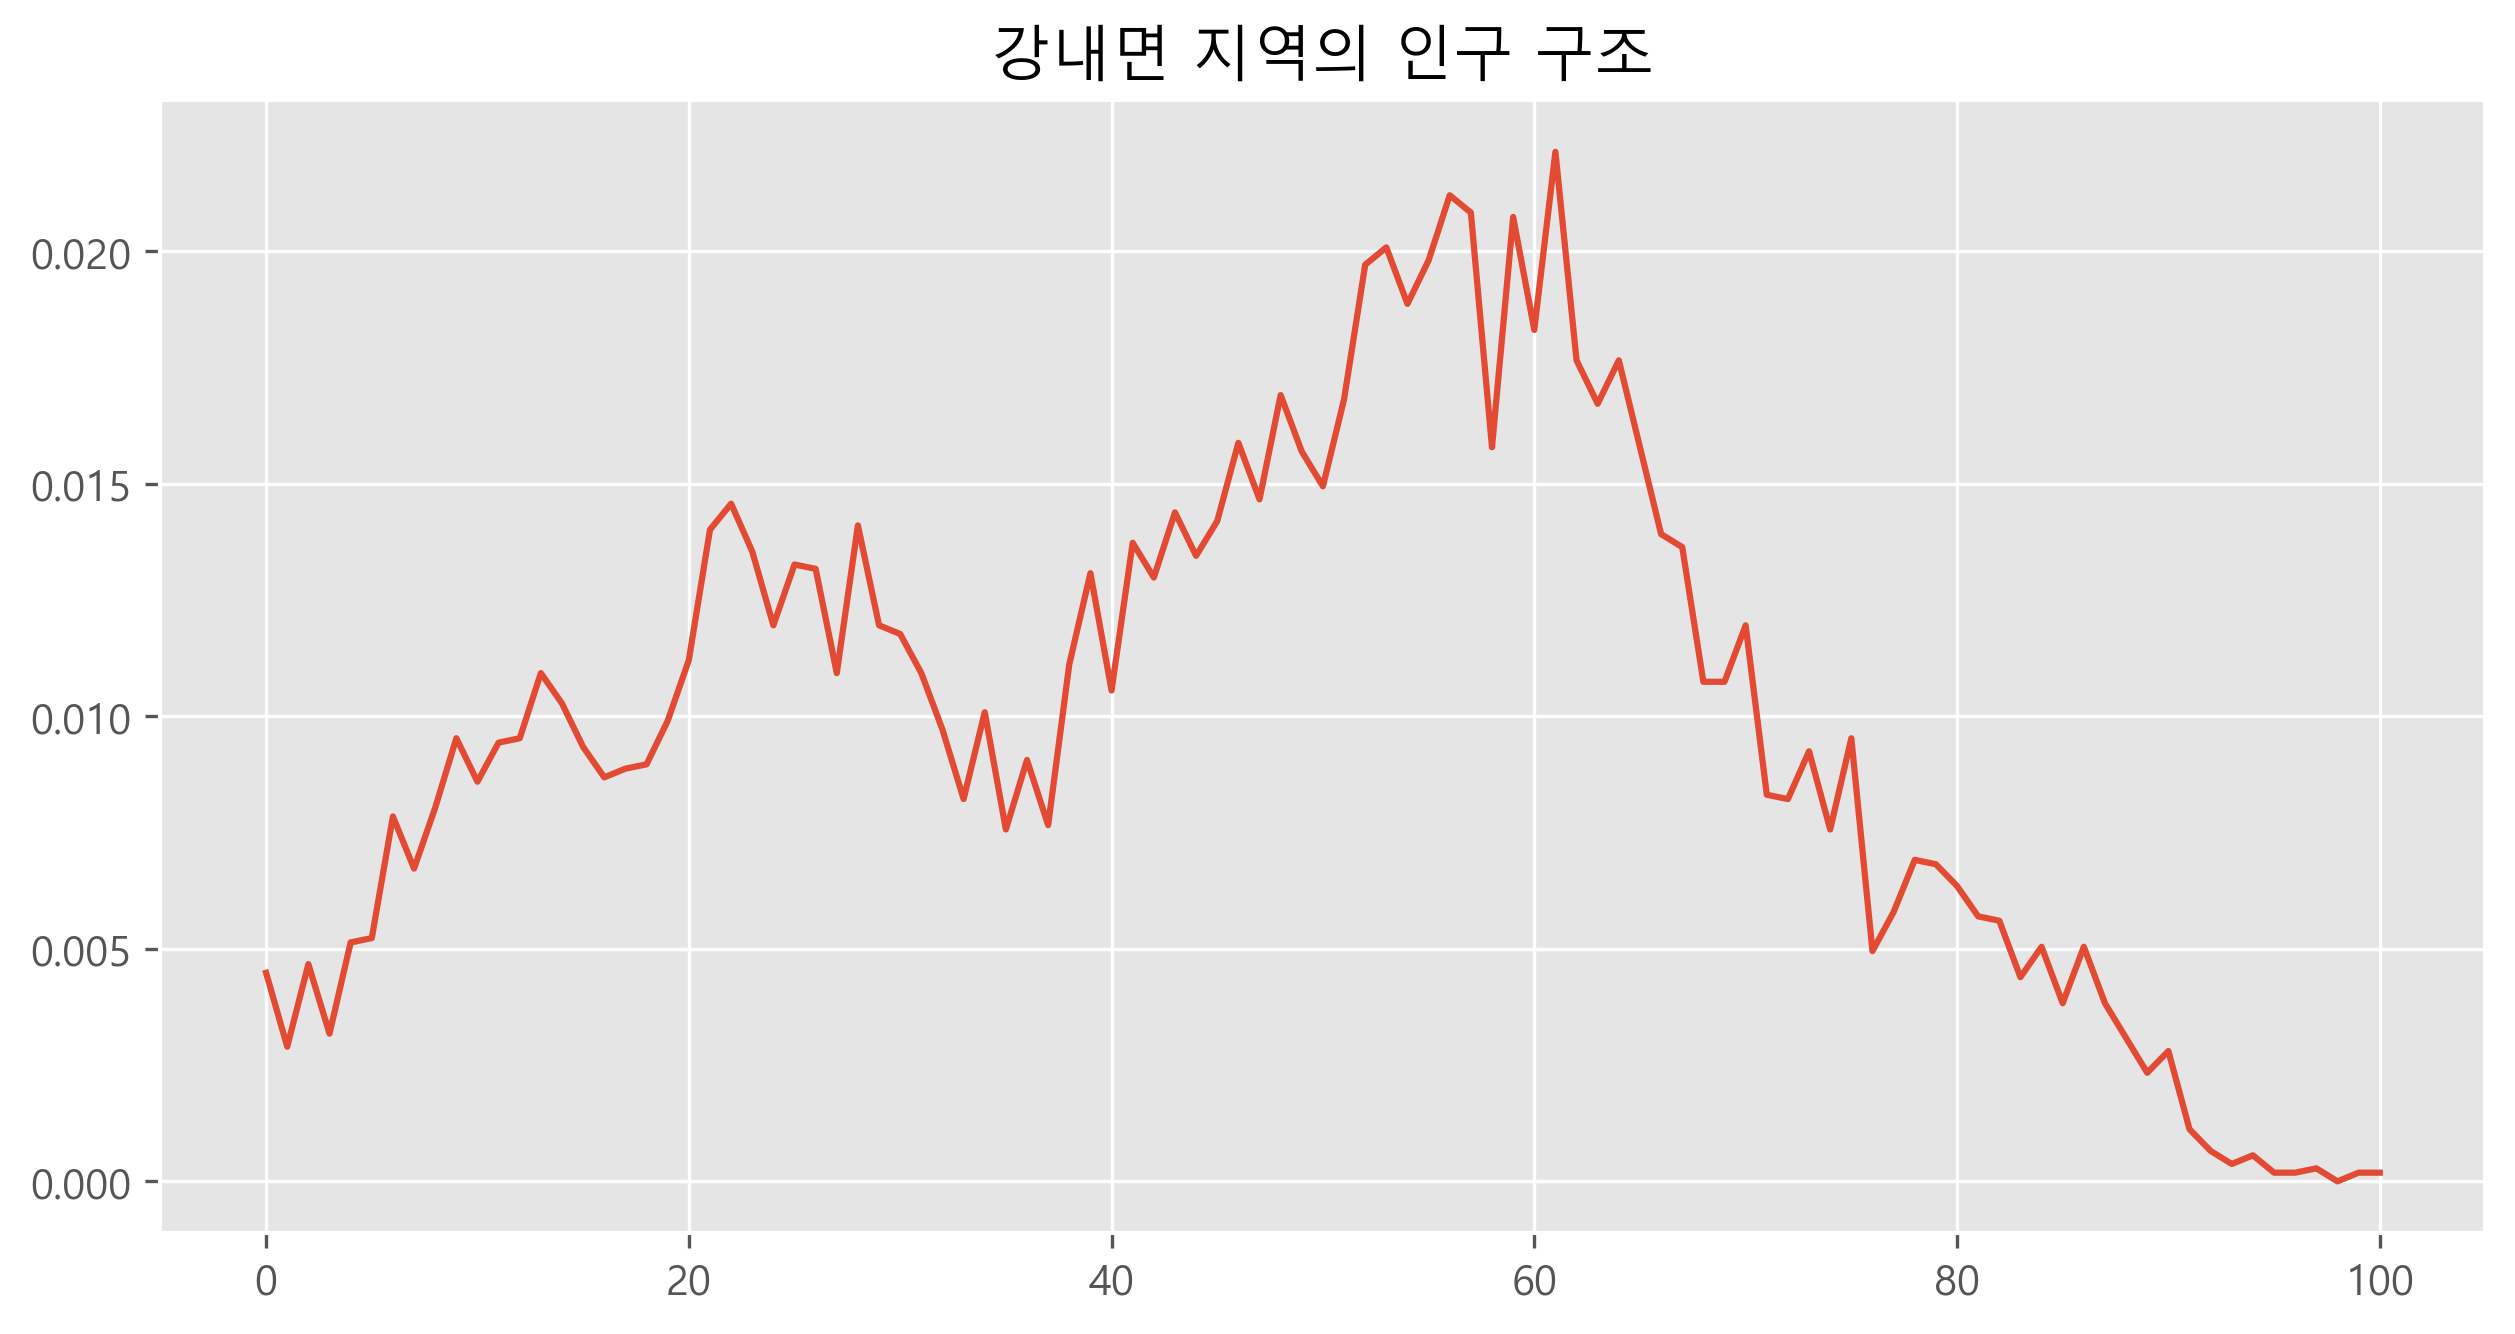

In [8]:
# https://www.data.go.kr/

import numpy as np
import csv
f = open('age.csv')
data = csv.reader(f)
next(data)
name = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요:")
for row in data:
    if name in row[0]:
        for i in range(2,104) :
            row[i] = int(row[i].replace(",",""))
        home = np.array(row[3:], dtype=int) / row[2]
#print(home)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
plt.rc('font',family='Malgun Gothic')
plt.title(name + ' 지역의 인구 구조')
plt.plot(home)
plt.show()

In [10]:
# https://www.data.go.kr/

import numpy as np
import csv
f = open('age.csv')
data = csv.reader(f)
next(data)
data = list(data)

name = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요:")
for row in data:
    if name in row[0]:
        for i in range(2,104) :
            row[i] = int(row[i].replace(",",""))
        home = np.array(row[3:], dtype=int) / row[2]

for row in data:
    print(row)


['서울특별시  (1100000000)', '9,494,807', '9,494,807', '41,427', '44,825', '46,252', '49,895', '53,002', '58,509', '65,624', '67,693', '66,371', '71,141', '72,390', '74,082', '70,166', '71,745', '78,047', '74,688', '71,530', '74,012', '81,501', '84,824', '92,850', '111,538', '121,583', '128,676', '141,678', '150,861', '161,696', '163,871', '168,063', '171,906', '169,193', '153,291', '147,175', '142,440', '134,173', '133,285', '134,211', '131,125', '139,190', '146,645', '155,149', '154,567', '153,359', '138,738', '135,274', '135,700', '136,134', '145,013', '156,509', '160,480', '163,493', '168,536', '160,635', '164,161', '147,296', '139,661', '140,182', '142,830', '132,031', '148,555', '137,428', '158,684', '152,788', '139,718', '134,302', '125,847', '120,435', '125,267', '99,564', '96,708', '91,995', '73,703', '83,526', '78,082', '78,855', '77,575', '53,931', '58,401', '54,651', '59,711', '57,281', '45,280', '40,005', '36,762', '31,075', '27,451', '23,794', '19,828', '15,701', '12,725', '10

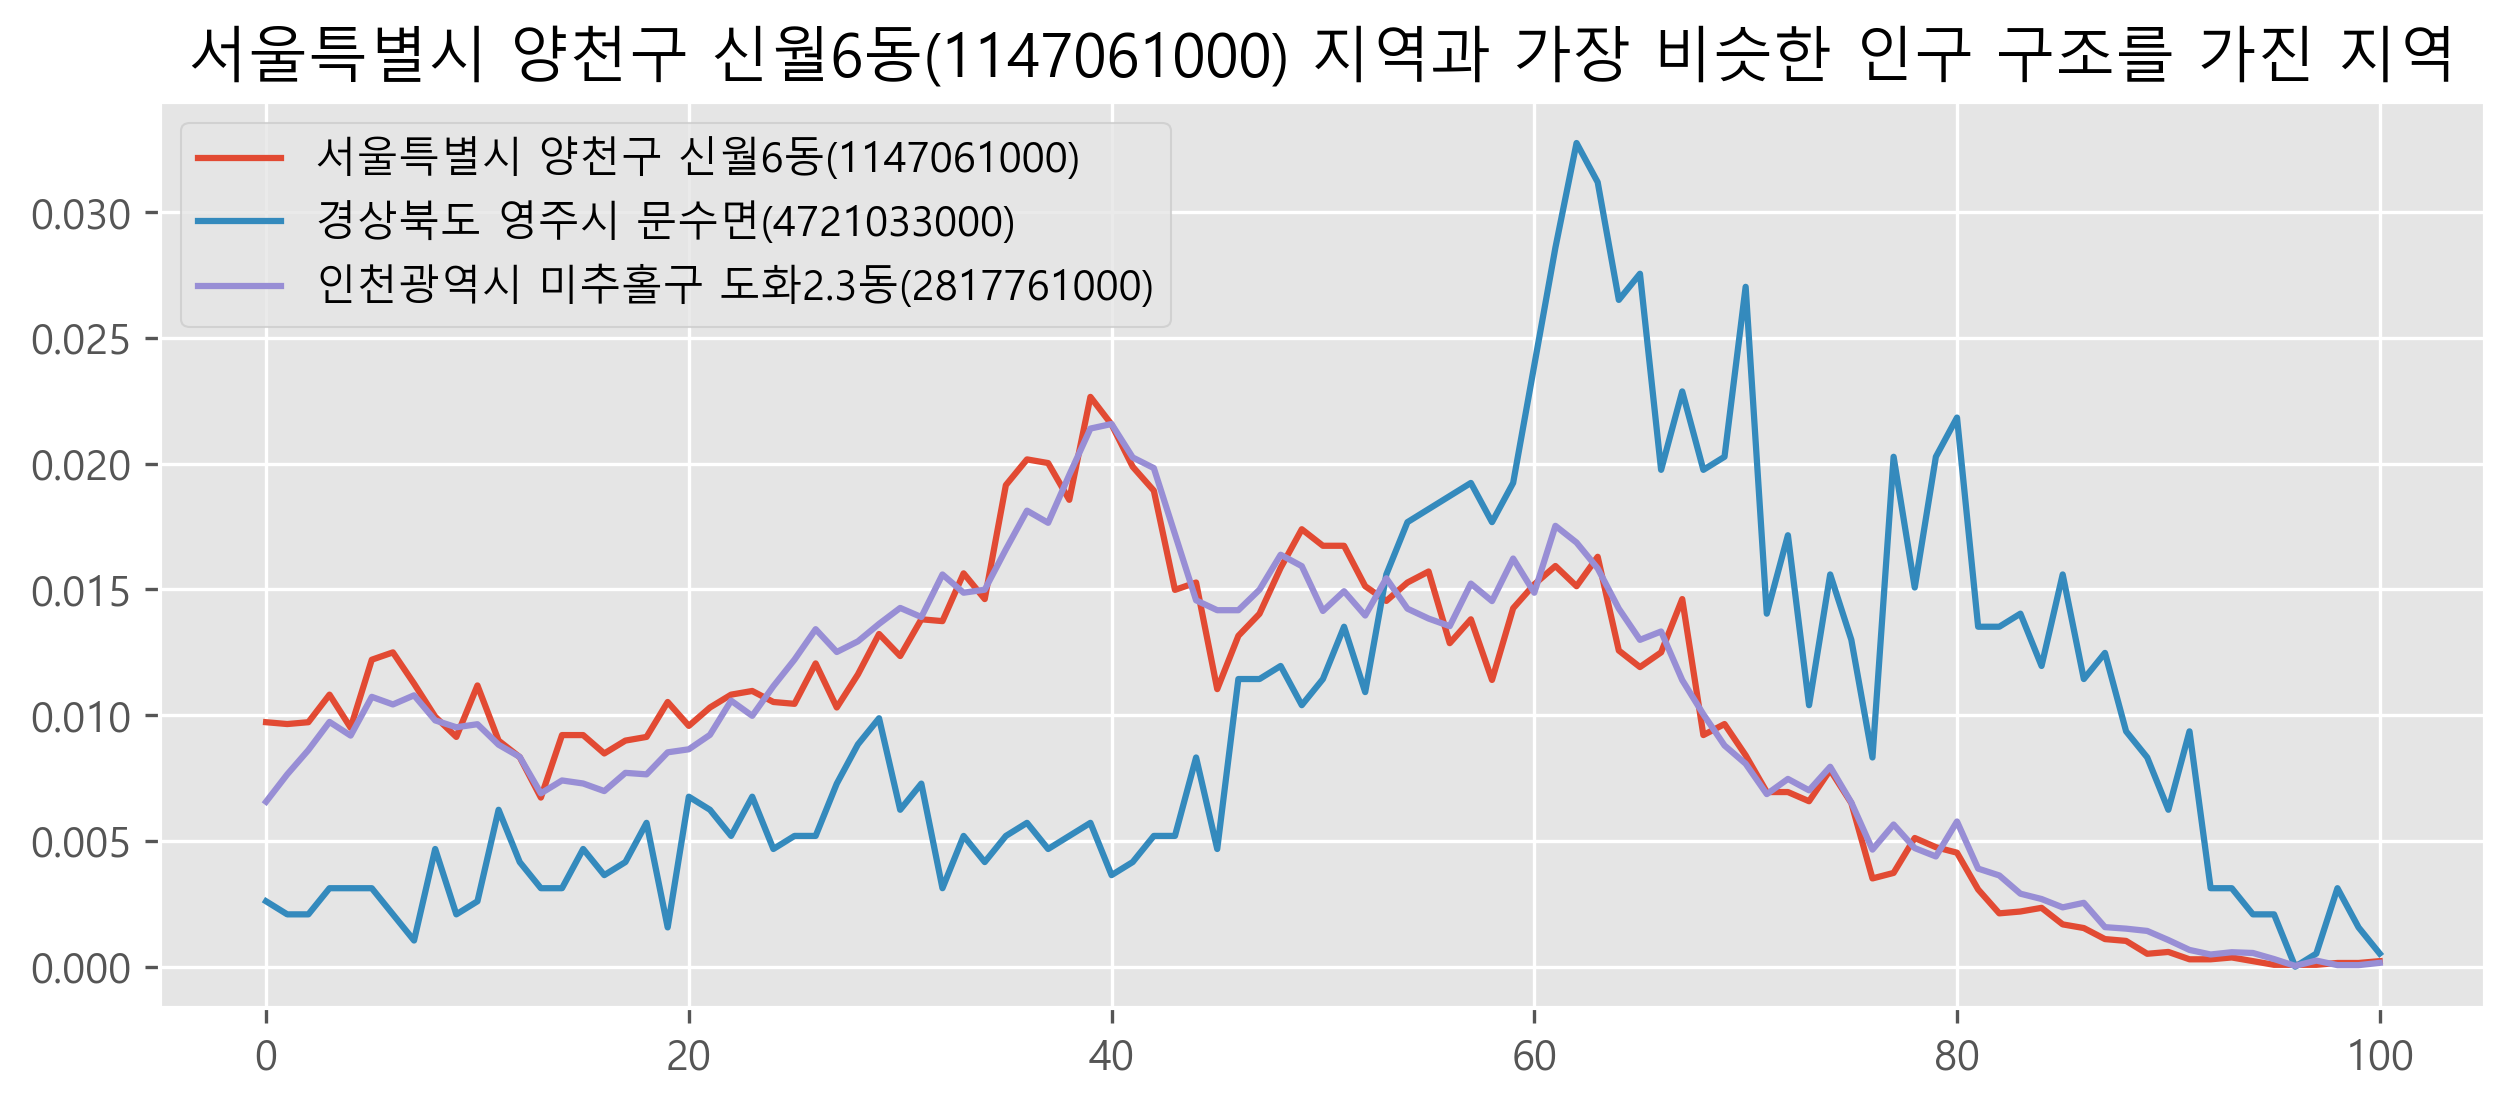

In [51]:
import numpy as np
import csv
f = open('age.csv')
data = csv.reader(f)
next(data)
data = list(data)
f.close()
name = ''
name_real = ''

find_area_name = ''
find_area_data = []
find_area_diff = 9999

find_area_name2 = ''
find_area_data2 = []
find_area_diff2 = 9999

name = input("검색하고자 하는 지역 이름을 입력해주세요:")
if name == "":
    name = "강내면"

while True:
    name_find_cnt = 0
    names_find = []
    for row in data:
        if name in row[0]:
            name_find_cnt += 1
            names_find.append(row[0])

    if name_find_cnt == 0:
        input("해당 지역이 없습니다. 확인 후 새 지역 이름 입력해주세요:")
    elif name_find_cnt == 1:
        break;
    else:
        input("해당 지역이 "+ str(name_find_cnt) +"개 검색되었습니다. 확인 후 정확한 지역 이름을 입력해주세요:")

for row in data:
    if name in row[0]:
        if int(row[2]) == 0:
            continue
        home = np.array(row[3:], dtype=int) / int(row[2])
        name_real = row[0]

for row in data:
    if int(row[2]) == 0:
        continue
    if row[0] == name_real:
        continue
    away = np.array(row[3:], dtype=int) / int(row[2])
    diff = np.sum(home - away)
    if find_area_diff > diff:
        find_area_name = row[0]
        find_area_data = away
        find_area_diff = diff
    diff = np.sum( (home - away ) ** 2 )
    if find_area_diff2 > diff:
        find_area_name2 = row[0]
        find_area_data2 = away
        find_area_diff2 = diff

import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
plt.figure(figsize=(10,4),dpi=300)
plt.style.use('ggplot')
plt.title(name_real + ' 지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label=name_real)
plt.plot(find_area_data, label=find_area_name)
plt.plot(find_area_data2, label=find_area_name2)
plt.legend()
plt.show()
